In [1]:
#import libraries

import numpy as np
import pandas as pd
import seaborn as sns
from datetime import time, date, datetime

import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

# Sample Info Page

**Purpose**: Record samples information. 

Note on historical data:
- is not up-to-date
- Use "FD **Sample** ID" to concatenate bkg information to other tables
- Use "FD **Run** ID" col as the *key* to join **analysis data**

Note on data handling:
- Cols to add on to the user inputs
    - 'Cryo Mix Coefficient' -> to calculate 'Yield'
- Cols needs formula for calculation
    - 'Yield (%)', 'Log loss '
- Cols to remove moving forward -> don't include in the Input
    - 'Storage tracking ','Seed treatment','Note'

In [29]:
# Import dataset
info_hist = pd.read_csv("/Users/miu/IFF_st/Data files/Pivot_SampleInfo_Hist.csv")

## A. Data Cleaning

In [4]:
# remove space before and after cols' names
info_hist.columns = [column.strip() for column in info_hist.columns]

In [5]:
info_hist.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['FD sample ID', 'FD Run ID', 'Strain', 'EFT date', 'Broth ID',
       'Fermentation Scale', 'Ferm condition', 'EFT (hr)',
       'Broth titer (CFU/mL)', 'Broth age (day)', 'Pelletization date',
       'Cryo mix', 'Ingredient 1', 'Ingredient 2', 'Ingredient 3',
       'Ingredient4', 'Cryo mix addition rate', 'FD start date',
       'FD cycle recipe', 'FD pressure (mTorr)', 'FD run time (hr)',
       'Primary ramp rate (C/min)', 'PA receive date', 'Dried appearance',
       'Container', 'Water activity', 'Viability (CFU/g)', 'Yield (%)',
       'Log loss', 'Storage tracking', 'Seed treatment', 'Note'],
      dtype='object')>

In [6]:
# Drop non-tracking cols
info_hist.drop(['Storage tracking','Seed treatment','Ingredient4','Yield (%)','Log loss','Note'], axis=1, inplace=True)
info_hist.dropna(subset='FD Run ID', inplace=True)

<Axes: >

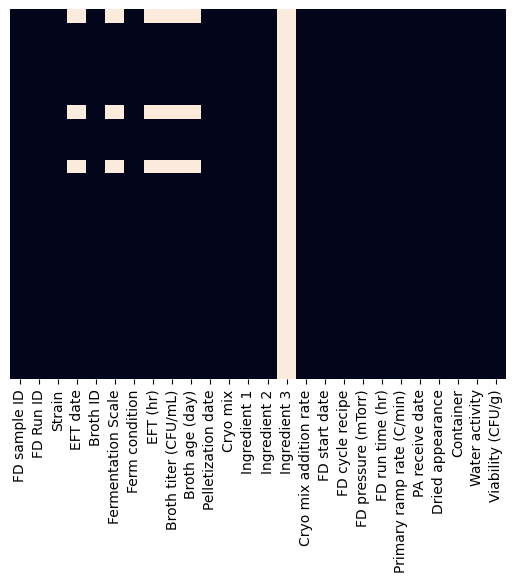

In [7]:
# check NaN values
sns.heatmap(info_hist.isnull(), yticklabels=False, cbar=False)

In [53]:
info_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   FD sample ID               27 non-null     object 
 1   FD Run ID                  27 non-null     object 
 2   Strain                     27 non-null     object 
 3   EFT date                   24 non-null     object 
 4   Broth ID                   27 non-null     object 
 5   Fermentation Scale         24 non-null     object 
 6   Ferm condition             27 non-null     object 
 7   EFT (hr)                   24 non-null     float64
 8   Broth titer (CFU/mL)       24 non-null     float64
 9   Broth age (day)            24 non-null     float64
 10  Pelletization date         27 non-null     object 
 11  Cryo mix                   27 non-null     object 
 12  Ingredient 1               27 non-null     object 
 13  Ingredient 2               27 non-null     object 
 

### Date time

New data coming in 'PA receive date' can contain: "Dry in PA".
- Convert to right format for normal date, with errors='coerce'
- Revert NaT back to 'Dry in PA'

Because if use errors='ignore' -> the normal date will not be converted to wanted format

In [54]:
time_feat = ['EFT date','Pelletization date','FD start date','PA receive date']

In [58]:
for col in time_feat:
    info_hist[col] = pd.to_datetime(info_hist[col],infer_datetime_format=True,format="%m/%d/%y",errors='coerce')

In [59]:
info_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   FD sample ID               27 non-null     object        
 1   FD Run ID                  27 non-null     object        
 2   Strain                     27 non-null     object        
 3   EFT date                   24 non-null     datetime64[ns]
 4   Broth ID                   27 non-null     object        
 5   Fermentation Scale         24 non-null     object        
 6   Ferm condition             27 non-null     object        
 7   EFT (hr)                   24 non-null     float64       
 8   Broth titer (CFU/mL)       24 non-null     float64       
 9   Broth age (day)            24 non-null     float64       
 10  Pelletization date         27 non-null     datetime64[ns]
 11  Cryo mix                   27 non-null     object        
 12  Ingredient

In [60]:
info_hist[['EFT date','Pelletization date','FD start date','PA receive date']]

,EFT date,Pelletization date,FD start date,PA receive date
0,NaT,2022-12-28,2023-04-03,2023-04-05
1,2023-02-24,2023-02-27,2023-04-03,2023-04-05
2,2023-02-24,2023-02-27,2023-04-03,2023-04-05
3,2023-02-24,2023-02-27,2023-04-03,2023-04-05
4,2023-02-24,2023-02-27,2023-04-05,2023-04-12
5,2023-02-24,2023-02-27,2023-04-05,2023-04-12
6,2023-02-24,2023-02-27,2023-04-05,2023-04-12
7,NaT,2022-12-28,2023-04-07,2023-04-12
8,2023-02-24,2023-02-27,2023-04-07,2023-04-12
9,2023-02-24,2023-02-27,2023-04-07,2023-04-12


In [61]:
info_hist['PA receive date'] = info_hist['PA receive date'].replace({np.nan: 'Dry in PA'})

In [62]:
info_hist[['EFT date','Pelletization date','FD start date','PA receive date']]

,EFT date,Pelletization date,FD start date,PA receive date
0,NaT,2022-12-28,2023-04-03,2023-04-05 00:00:00
1,2023-02-24,2023-02-27,2023-04-03,2023-04-05 00:00:00
2,2023-02-24,2023-02-27,2023-04-03,2023-04-05 00:00:00
3,2023-02-24,2023-02-27,2023-04-03,2023-04-05 00:00:00
4,2023-02-24,2023-02-27,2023-04-05,2023-04-12 00:00:00
5,2023-02-24,2023-02-27,2023-04-05,2023-04-12 00:00:00
6,2023-02-24,2023-02-27,2023-04-05,2023-04-12 00:00:00
7,NaT,2022-12-28,2023-04-07,2023-04-12 00:00:00
8,2023-02-24,2023-02-27,2023-04-07,2023-04-12 00:00:00
9,2023-02-24,2023-02-27,2023-04-07,2023-04-12 00:00:00


In [47]:
info_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   FD sample ID               27 non-null     object        
 1   FD Run ID                  27 non-null     object        
 2   Strain                     27 non-null     object        
 3   EFT date                   24 non-null     datetime64[ns]
 4   Broth ID                   27 non-null     object        
 5   Fermentation Scale         24 non-null     object        
 6   Ferm condition             27 non-null     object        
 7   EFT (hr)                   24 non-null     float64       
 8   Broth titer (CFU/mL)       24 non-null     float64       
 9   Broth age (day)            24 non-null     float64       
 10  Pelletization date         27 non-null     datetime64[ns]
 11  Cryo mix                   27 non-null     object        
 12  Ingredient

### Numerical Features 

**FD run time (hr):** remove the str 'hr' and convert to float

In [12]:
info_hist['FD run time (hr)'][0].split()[0]

'57'

In [ ]:
info_hist['FD run time (hr)'] = info_hist['FD run time (hr)'].apply(lambda x:float(x.split()[0]))

In [14]:
info_hist['FD run time (hr)']

0     57.0
1     57.0
2     57.0
3     57.0
4     57.0
      ... 
65    22.0
66    25.0
67    25.0
68    25.0
69    25.0
Name: FD run time (hr), Length: 70, dtype: float64

**'Viability (CFU/g)'**: replace '#DIV/0!' and 'n/m' with NaN, convert to float

In [17]:
info_hist['Viability (CFU/g)'] = info_hist['Viability (CFU/g)'].replace(['#DIV/0!','n/m'], np.NaN)
info_hist['Viability (CFU/g)'] = info_hist['Viability (CFU/g)'].astype(float)

In [18]:
info_hist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 0 to 69
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   FD sample ID               70 non-null     object        
 1   FD Run ID                  70 non-null     object        
 2   Strain                     70 non-null     object        
 3   EFT date                   49 non-null     datetime64[ns]
 4   Broth ID                   70 non-null     object        
 5   Fermentation Scale         65 non-null     object        
 6   Ferm condition             70 non-null     object        
 7   EFT (hr)                   49 non-null     float64       
 8   Broth titer (CFU/mL)       49 non-null     float64       
 9   Broth age (day)            49 non-null     float64       
 10  Pelletization date         66 non-null     datetime64[ns]
 11  Cryo mix                   69 non-null     object        
 12  Ingredient

## B. Feature Engineering

In [19]:
cryo_coef = {
    'PVT70%': 0.285,
    'DSR': 0.342,
    'SKP': 0.380
}

In [20]:
info_hist['Cryo mix Coef'] = info_hist['Cryo mix'].map(cryo_coef)

In [22]:
to_cal = info_hist[['Broth titer (CFU/mL)','Viability (CFU/g)','Cryo mix Coef']]

In [23]:
to_cal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 0 to 69
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Broth titer (CFU/mL)  49 non-null     float64
 1   Viability (CFU/g)     67 non-null     float64
 2   Cryo mix Coef         69 non-null     float64
dtypes: float64(3)
memory usage: 4.2 KB


In [24]:
to_cal.head()

,Broth titer (CFU/mL),Viability (CFU/g),Cryo mix Coef
0,3.540000e+11,NaN,0.380
1,3.540000e+11,1.840000e+11,0.342
2,1.180000e+11,6.610000e+10,0.285
3,3.540000e+11,3.150000e+11,0.285
4,1.180000e+11,4.070000e+10,0.380


In [25]:
def cal_yield(row):
    if row.isna().any():
        return np.nan
    else:
        return round((row['Viability (CFU/g)']*row['Cryo mix Coef']/row['Broth titer (CFU/mL)'])*100,2)

In [26]:
def log_loss(x):
    if pd.isna(x):
        return np.nan
    else:
        return round(np.log10(x/100),2)

In [27]:
info_hist['Yield (%)'] = to_cal.apply(cal_yield, axis=1)

In [31]:
info_hist['Log Loss'] = info_hist['Yield (%)'].apply(log_loss)

In [32]:
info_hist.head()

,FD sample ID,FD Run ID,Strain,EFT date,Broth ID,Fermentation Scale,Ferm condition,EFT (hr),Broth titer (CFU/mL),Broth age (day),...,FD run time (hr),Primary ramp rate (C/min),PA receive date,Dried appearance,Container,Water activity,Viability (CFU/g),Cryo mix Coef,Yield (%),Log Loss
0,22PT1202-10,FDL-105A-T01,Klebsiella variicola,2022-12-01,P080-22-Y048,14L,"Potato peptone and tryptone, high viscosity by...",48.0,3.540000e+11,1.0,...,57.0,NaN,2022-12-20,fused/melted moist cake,Foil pouch,0.37,NaN,0.380,NaN,NaN
1,22PT1202-12,FDL-105A-T02,Klebsiella variicola,2022-12-01,P080-22-Y048,14L,"Potato peptone and tryptone, high viscosity by...",48.0,3.540000e+11,1.0,...,57.0,NaN,2022-12-20,"Collapse, no dust",Foil pouch,0.06,1.840000e+11,0.342,17.78,-0.75
2,22PT1202-5,FDL-105A-T03,Kosakonia sacchari,2022-12-01,P080-22-Y046,14L,"Potato peptone and tryptone, high viscosity by...",48.0,1.180000e+11,1.0,...,57.0,NaN,2022-12-20,"Collapse, some dust",Foil pouch,0.24,6.610000e+10,0.285,15.96,-0.80
3,22PT1202-11,FDL-105A-T04,Klebsiella variicola,2022-12-01,P080-22-Y048,14L,"Potato peptone and tryptone, high viscosity by...",48.0,3.540000e+11,1.0,...,57.0,NaN,2022-12-20,"Collapse, no dust",Foil pouch,0.05,3.150000e+11,0.285,25.36,-0.60
4,22PT1202-1,FDL-105B-T05,Kosakonia sacchari,2022-12-01,P080-22-Y046,14L,"Potato peptone and tryptone, low viscosity",48.0,1.180000e+11,1.0,...,57.0,NaN,2022-12-22,"friable cake, readily broke into pellets",Foil pouch,0.42,4.070000e+10,0.380,13.11,-0.88


## C. Function

In [27]:
def data_cleaning(df):
    df.columns = [column.strip() for column in df.columns]
    df.drop(['Storage tracking','Seed treatment','Ingredient4','Yield (%)','Log loss','Note'], axis=1, inplace=True)
    df.dropna(subset='FD Run ID', inplace=True)
    
    time_feat = ['EFT date','Pelletization date','FD start date','PA receive date']
    for col in time_feat:
        df[col] = pd.to_datetime(df[col],infer_datetime_format=True,format="%m/%d/%y",errors='coerce')
    df['PA receive date'] = df['PA receive date'].replace({np.nan: 'Dry in PA'})
    
    df['FD run time (hr)'] = df['FD run time (hr)'].apply(lambda x:float(x.split()[0]))
    
    df['Viability (CFU/g)'] = df['Viability (CFU/g)'].replace(['#DIV/0!','n/m'], np.NaN)
    df['Viability (CFU/g)'] = df['Viability (CFU/g)'].astype(float)
    
    return df

In [9]:
def feature_eng(df):
    cryo_coef = {
    'PVT70%': 0.285,
    'DSR': 0.342,
    'SKP': 0.380
    }
    
    df['Cryo mix Coef'] = df['Cryo mix'].map(cryo_coef)
    
    return df

In [10]:
def cal_yield(row):
    if row.isna().any():
        return np.nan
    else:
        return round((row['Viability (CFU/g)']*row['Cryo mix Coef']/row['Broth titer (CFU/mL)'])*100,2)

def log_loss(x):
    if pd.isna(x):
        return np.nan
    else:
        return round(np.log10(x/100),2)

In [16]:
def sample_info(df):
    df = data_cleaning(df)
    df = feature_eng(df)
    
    to_cal = df[['Broth titer (CFU/mL)','Viability (CFU/g)','Cryo mix Coef']]
    df['Yield (%)'] = to_cal.apply(cal_yield, axis=1)
    df['Log Loss'] = df['Yield (%)'].apply(log_loss)
    
    return df

**Unit test**

In [30]:
sample_info(info_hist)

,FD sample ID,FD Run ID,Strain,EFT date,Broth ID,Fermentation Scale,Ferm condition,EFT (hr),Broth titer (CFU/mL),Broth age (day),...,FD run time (hr),Primary ramp rate (C/min),PA receive date,Dried appearance,Container,Water activity,Viability (CFU/g),Cryo mix Coef,Yield (%),Log Loss
0,22PT1202-10,FDL-105A-T01,Klebsiella variicola,2022-12-01,P080-22-Y048,14L,"Potato peptone and tryptone, high viscosity by...",48.0,3.540000e+11,1.0,...,57.0,NaN,2022-12-20 00:00:00,fused/melted moist cake,Foil pouch,0.37,NaN,0.380,NaN,NaN
1,22PT1202-12,FDL-105A-T02,Klebsiella variicola,2022-12-01,P080-22-Y048,14L,"Potato peptone and tryptone, high viscosity by...",48.0,3.540000e+11,1.0,...,57.0,NaN,2022-12-20 00:00:00,"Collapse, no dust",Foil pouch,0.06,1.840000e+11,0.342,17.78,-0.75
2,22PT1202-5,FDL-105A-T03,Kosakonia sacchari,2022-12-01,P080-22-Y046,14L,"Potato peptone and tryptone, high viscosity by...",48.0,1.180000e+11,1.0,...,57.0,NaN,2022-12-20 00:00:00,"Collapse, some dust",Foil pouch,0.24,6.610000e+10,0.285,15.96,-0.80
3,22PT1202-11,FDL-105A-T04,Klebsiella variicola,2022-12-01,P080-22-Y048,14L,"Potato peptone and tryptone, high viscosity by...",48.0,3.540000e+11,1.0,...,57.0,NaN,2022-12-20 00:00:00,"Collapse, no dust",Foil pouch,0.05,3.150000e+11,0.285,25.36,-0.60
4,22PT1202-1,FDL-105B-T05,Kosakonia sacchari,2022-12-01,P080-22-Y046,14L,"Potato peptone and tryptone, low viscosity",48.0,1.180000e+11,1.0,...,57.0,NaN,2022-12-22 00:00:00,"friable cake, readily broke into pellets",Foil pouch,0.42,4.070000e+10,0.380,13.11,-0.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,23PT0406-KLUB,FD-23-0010-T3,Klebsiella variicola,2023-04-05,P010-23-Y030,14L,Tryptone+Peptone,48.0,3.290000e+11,1.0,...,56.0,0.050,Dry in PA,"brown/whiteish-tan speckled, free-flowing pell...",Mylar bag,0.037,4.710000e+11,0.285,40.80,-0.39
93,23PT0406-KLUB,FD-23-0010-T4,Klebsiella variicola,2023-04-05,P010-23-Y030,14L,Tryptone+Peptone,48.0,3.290000e+11,1.0,...,56.0,0.050,Dry in PA,"Brown caking; sticky core, some dust",Mylar bag,0.364,5.360000e+11,0.285,46.43,-0.33
94,23PT0406-KLUB,FD-23-0010-T5,Klebsiella variicola,2023-04-05,P010-23-Y030,14L,Tryptone+Peptone,48.0,3.290000e+11,1.0,...,56.0,0.050,Dry in PA,"Brown caking; sticky core, some dust",Mylar bag,0.345,3.380000e+11,0.285,29.28,-0.53
95,23PT0406-KLUB,FD-23-0010-T6,Klebsiella variicola,2023-04-05,P010-23-Y030,14L,Tryptone+Peptone,48.0,3.290000e+11,1.0,...,56.0,0.050,Dry in PA,"Brown caking; sticky core, some dust",Mylar bag,0.343,5.590000e+11,0.285,48.42,-0.31


---

In [6]:
def cast_df_columns(df):
    """
    The cast_df_columns function takes a dataframe as input and returns the same dataframe with
    the columns that are categorical variables cast to pandas.Categorical dtype. The function also adds
    categories to each column that were not present in the original dataset, but are present in other datasets.

    :param df: Pass in the dataframe to be modified
    :return: The dataframe with the columns casted as categories
    """
    mapping_category_to_col = {
        "Strain": ['Klebsiella variicola', 'Kosakonia sacchari'],
        'Fermentation Scale': ['14L', '150K'],
        'Ingredient 1': ['40% Sucrose', '45.5% Sucrose'],
        'Ingredient 2': ['8% KH2PO4', '10% Maltodextrin', '22.75% Inulin'],
        'Ingredient 3': ['10.2% K2HPO4', '0.5% MgSO4'],
        'Ingredient 4': [],
        'Container': ['Foil pouch']
    }
    for col, categories in mapping_category_to_col.items():
        if col in df.columns:
            df[col] = df[col].astype("category").cat.add_categories(categories)

    return df

In [18]:
# Structure of In-pack df TO ACHIEVE:
inpack_df = pd.read_excel("Data files/PIVOT Sample Master List 2023.xlsm", sheet_name='WP4 In-pack Data')
inpack_df.head()

,Unique ID,FD sample ID,FD Run ID,Strain,Cryo mix,Sub-Sample,Ferm Condition,Storage form,Temperature (°C),Container,...,Rsquared_fitted,decay_rate_errbar,decay_rate_lower95interval,decay_rate_upper95interval,estimate_day_2e10,Week 0 Aw,Week 2 Aw,Week 4 Aw,Week 8 Aw,Week 12 Aw
0,1,IFF09152022-1,FDL-099A,Klebsiella variicola,PVT,pellet_21_mylar_n,"Greens, high EPS",Pellet,21,Mylar,...,0.996659,0.000881,-0.008642,-0.006880,168.374192,0.165,NaN,0.175,0.205,NaN
1,2,IFF09152022-1,FDL-099A,Klebsiella variicola,PVT,pellet_21_mylar_cacl2,"Greens, high EPS",Pellet,21,Mylar,...,0.939662,0.005588,-0.016840,-0.005663,116.142074,0.165,NaN,0.125,0.153,NaN
2,3,IFF09152022-1,FDL-099A,Klebsiella variicola,PVT,unbulked powder_21_mylar_n,"Greens, high EPS",Unbulked powder,21,Mylar,...,0.990339,0.002946,-0.018166,-0.012273,85.502213,0.289,NaN,0.23,0.268,NaN
3,4,IFF09152022-1,FDL-099A,Klebsiella variicola,PVT,"bulked powder, pre-dried bulking_21_mylar_n","Greens, high EPS","Bulked powder, pre-dried bulking",21,Mylar,...,0.993116,0.001788,-0.012742,-0.009167,88.342199,0.224,NaN,0.174,0.221,NaN
4,5,IFF09152022-1,FDL-099A,Klebsiella variicola,PVT,"bulked powder, w/o sio2_21_mylar_n","Greens, high EPS","Bulked powder, w/o SiO2",21,Mylar,...,0.998539,0.001091,-0.015640,-0.013459,73.940614,0.229,NaN,0.21,0.257,NaN


In [19]:
inpack_df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['Unique ID', 'FD sample ID', 'FD Run ID', 'Strain', 'Cryo mix',
       'Sub-Sample', 'Ferm Condition', 'Storage form', 'Temperature (°C)',
       'Container', 'Bulking', 'Desiccant', 'Quantity (g)', 'Sample location',
       'Week 0 CFU/g', 'Week 2 CFU/g', 'Week 4 CFU/g', 'Week 8 CFU/g',
       'Week 12 CFU/g', 'decay_rate_fitted', 'Rsquared_fitted',
       'decay_rate_errbar', 'decay_rate_lower95interval',
       'decay_rate_upper95interval', 'estimate_day_2e10', 'Week 0 Aw',
       'Week 2 Aw', 'Week 4 Aw', 'Week 8 Aw', 'Week 12 Aw'],
      dtype='object')>

In [21]:
inpack_df.drop(['Unique ID','FD sample ID','Quantity (g)','Sample location'],axis=1,inplace=True)

*In-pack* available features:
- Key: FD Run ID
- CFU values by week
- Water activity by week

**Features carry** to *In-pack*:
- Key: **'FD Run ID'** 
- Cols: 'Strain','Cryo mix','Ferm condition','Container', 

**User Inputs** for 'In-pack' (create a new form/table, different from the Sample Info table):
- 'Temperature (°C)', 'Bulking', 'Desiccant', 'Storage form'
    
    Note:
    - Ferm condition: shorten the description from the "Info"
    
**Features to calculate**
- 'decay_rate_fitted', 'Rsquared_fitted','decay_rate_errbar', 'decay_rate_lower95interval', 'decay_rate_upper95interval', 'estimate_day_2e10'

In [24]:
sample_info.head()

,FD sample ID,FD Run ID,Strain,EFT date,Broth ID,Fermentation Scale,Ferm condition,EFT (hr),Broth titer (CFU/mL),Broth age (day),...,FD pressure (mTorr),FD run time (hr),Primary ramp rate (C/min),PA receive date,Dried appearance,Container,Water activity,Viability (CFU/g),Yield (%),Log loss
0,22PT1202-10,FDL-105A-T01,Klebsiella variicola,2022-12-01 00:00:00,P080-22-Y048,14L,"Potato peptone and tryptone, high viscosity by...",48.0,3.540000e+11,1.0,...,110-580,57 hr,NaN,2022-12-20,fused/melted moist cake,Foil pouch,0.37,n/m,n/m,n/m
1,22PT1202-12,FDL-105A-T02,Klebsiella variicola,2022-12-01 00:00:00,P080-22-Y048,14L,"Potato peptone and tryptone, high viscosity by...",48.0,3.540000e+11,1.0,...,110-580,57 hr,NaN,2022-12-20,"Collapse, no dust",Foil pouch,0.06,184300000000,0.178053,-0.749452
2,22PT1202-5,FDL-105A-T03,Kosakonia sacchari,2022-12-01 00:00:00,P080-22-Y046,14L,"Potato peptone and tryptone, high viscosity by...",48.0,1.180000e+11,1.0,...,110-580,57 hr,NaN,2022-12-20,"Collapse, some dust",Foil pouch,0.24,66120000000,0.159697,-0.796704
3,22PT1202-11,FDL-105A-T04,Klebsiella variicola,2022-12-01 00:00:00,P080-22-Y048,14L,"Potato peptone and tryptone, high viscosity by...",48.0,3.540000e+11,1.0,...,110-580,57 hr,NaN,2022-12-20,"Collapse, no dust",Foil pouch,0.05,315400000000,0.253924,-0.595297
4,22PT1202-1,FDL-105B-T05,Kosakonia sacchari,2022-12-01 00:00:00,P080-22-Y046,14L,"Potato peptone and tryptone, low viscosity",48.0,1.180000e+11,1.0,...,110-580,57 hr,NaN,2022-12-22,"friable cake, readily broke into pellets",Foil pouch,0.42,40660000000,0.130939,-0.882931


In [34]:
inpack_df.columns = [column.strip() for column in inpack_df.columns]
sample_info.columns = [column.strip() for column in sample_info.columns]

In [37]:
set(sample_info.columns).intersection(set(inpack_df.columns))

{'Container', 'Cryo mix', 'FD Run ID', 'Strain'}

In [39]:
temp = pd.merge(left=inpack_df,right=sample_info.drop(['Container', 'Cryo mix', 'Strain'], axis=1), on='FD Run ID')

In [43]:
temp.columns

Index(['FD Run ID', 'Strain', 'Cryo mix', 'Sub-Sample', 'Ferm Condition',
       'Storage form', 'Temperature (°C)', 'Container', 'Bulking', 'Desiccant',
       'Week 0 CFU/g', 'Week 2 CFU/g', 'Week 4 CFU/g', 'Week 8 CFU/g',
       'Week 12 CFU/g', 'decay_rate_fitted', 'Rsquared_fitted',
       'decay_rate_errbar', 'decay_rate_lower95interval',
       'decay_rate_upper95interval', 'estimate_day_2e10', 'Week 0 Aw',
       'Week 2 Aw', 'Week 4 Aw', 'Week 8 Aw', 'Week 12 Aw', 'FD sample ID',
       'EFT date', 'Broth ID', 'Fermentation Scale', 'Ferm condition',
       'EFT (hr)', 'Broth titer (CFU/mL)', 'Broth age (day)',
       'Pelletization date', 'Ingredient 1', 'Ingredient 2', 'Ingredient 3',
       'Ingredient4', 'Cryo mix addition rate', 'FD start date',
       'FD cycle recipe', 'FD pressure (mTorr)', 'FD run time (hr)',
       'Primary ramp rate (C/min)', 'PA receive date', 'Dried appearance',
       'Water activity', 'Viability (CFU/g)', 'Yield (%)', 'Log loss'],
      dtype='ob

In [44]:
cols = ['FD Run ID','Storage form','Temperature (°C)','Desiccant']
real_input_df = inpack_df[cols]

In [50]:
real_input_df

,FD Run ID,Storage form,Temperature (°C),Desiccant
0,FDL-099A,Pellet,21,N
1,FDL-099A,Pellet,21,2%CaCl2
2,FDL-099A,Unbulked powder,21,5%SIO2
3,FDL-099A,"Bulked powder, pre-dried bulking",21,5%SIO2
4,FDL-099A,"Bulked powder, w/o SiO2",21,5%SIO2
...,...,...,...,...
137,FDL-105C-T15-SKP,Bulked powder,21,5%SIO2
138,FDL-105C-T15-Try,Bulked powder,21,5%SIO2
139,FDL-105C-T14-Try,Bulked powder,21,5%SIO2
140,FDL-105D-T20-Try,Bulked powder,21,5%SIO2


In [46]:
temp = pd.merge(left=real_input_df,right=sample_info.drop(['Container', 'Cryo mix', 'Strain'], axis=1), on='FD Run ID')

In [48]:
temp.head()

,FD Run ID,Storage form,Temperature (°C),Desiccant,FD sample ID,EFT date,Broth ID,Fermentation Scale,Ferm condition,EFT (hr),...,FD cycle recipe,FD pressure (mTorr),FD run time (hr),Primary ramp rate (C/min),PA receive date,Dried appearance,Water activity,Viability (CFU/g),Yield (%),Log loss
0,FDL-105A-T02,Pellet,4,5%SIO2,22PT1202-12,2022-12-01 00:00:00,P080-22-Y048,14L,"Potato peptone and tryptone, high viscosity by...",48.0,...,PVT090-A0,110-580,57 hr,NaN,2022-12-20,"Collapse, no dust",0.06,184300000000,0.178053,-0.749452
1,FDL-105A-T02,Pellet,21,5%SIO2,22PT1202-12,2022-12-01 00:00:00,P080-22-Y048,14L,"Potato peptone and tryptone, high viscosity by...",48.0,...,PVT090-A0,110-580,57 hr,NaN,2022-12-20,"Collapse, no dust",0.06,184300000000,0.178053,-0.749452
2,FDL-105A-T02,Bulked powder,4,5%SIO2,22PT1202-12,2022-12-01 00:00:00,P080-22-Y048,14L,"Potato peptone and tryptone, high viscosity by...",48.0,...,PVT090-A0,110-580,57 hr,NaN,2022-12-20,"Collapse, no dust",0.06,184300000000,0.178053,-0.749452
3,FDL-105A-T02,Unbulked powder,21,5%SIO2,22PT1202-12,2022-12-01 00:00:00,P080-22-Y048,14L,"Potato peptone and tryptone, high viscosity by...",48.0,...,PVT090-A0,110-580,57 hr,NaN,2022-12-20,"Collapse, no dust",0.06,184300000000,0.178053,-0.749452
4,FDL-105A-T02,Bulked powder,21,5%SIO2,22PT1202-12,2022-12-01 00:00:00,P080-22-Y048,14L,"Potato peptone and tryptone, high viscosity by...",48.0,...,PVT090-A0,110-580,57 hr,NaN,2022-12-20,"Collapse, no dust",0.06,184300000000,0.178053,-0.749452


In [49]:
temp.columns

Index(['FD Run ID', 'Storage form', 'Temperature (°C)', 'Desiccant',
       'FD sample ID', 'EFT date', 'Broth ID', 'Fermentation Scale',
       'Ferm condition', 'EFT (hr)', 'Broth titer (CFU/mL)', 'Broth age (day)',
       'Pelletization date', 'Ingredient 1', 'Ingredient 2', 'Ingredient 3',
       'Ingredient4', 'Cryo mix addition rate', 'FD start date',
       'FD cycle recipe', 'FD pressure (mTorr)', 'FD run time (hr)',
       'Primary ramp rate (C/min)', 'PA receive date', 'Dried appearance',
       'Water activity', 'Viability (CFU/g)', 'Yield (%)', 'Log loss'],
      dtype='object')